# Problem Set #2: Supervised Learning II

## 1. [15 points] Logistic Regression: Training stability

### (a)

In [4]:
%cd src/
!python p01_lr.py
%cd ..

[Errno 2] No such file or directory: 'src/'
/Users/apple/Documents/Opencourses/CS229-fall-2018/stanford-notes/problem-sets/PS2/src


/Users/apple/miniconda3/envs/cs229/lib/python3.12/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


==== Training model on data set A ====
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Converged in 30372 iterations

==== Training model on data set B ====
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Finished 40000 iterations
Finished 50000 iterations
^C
Traceback (most recent call last):
  File "/Users/apple/Documents/Opencourses/CS229-fall-2018/stanford-notes/problem-sets/PS2/src/p01_lr.py", line 49, in <module>
    main()
  File "/Users/apple/Documents/Opencourses/CS229-fall-2018/stanford-notes/problem-sets/PS2/src/p01_lr.py", line 45, in main
    logistic_regression(Xb, Yb)
  File "/Users/apple/Documents/Opencourses/CS229-fall-2018/stanford-notes/problem-sets/PS2/src/p01_lr.py", line 28, in logistic_regression
    grad = calc_grad(X, Y, theta)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/apple/Documents/Opencourses/CS229-fall-2018/stanford-notes/problem-sets/PS2/src/p01_lr.py", line 13, in calc_grad
    grad = -(1

/Users/apple/miniconda3/envs/cs229/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Model trained on set A converged in 30372 iterations,
but model trained on set B seems to be divergent as its iteration number keeps growing

In [8]:
import matplotlib.pyplot as plt
from src import util
X_a,Y_a=util.load_csv('data/ds1_a.csv',add_intercept=False)
X_b,Y_b=util.load_csv('data/ds1_b.csv',add_intercept=False)

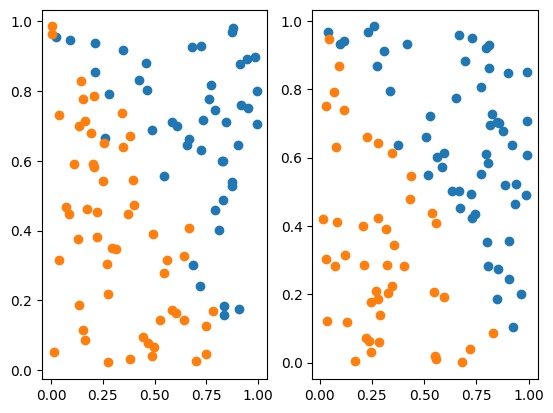

In [17]:
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.scatter(X_a[Y_a==1][:,0],X_a[Y_a==1][:,1])
ax1.scatter(X_a[Y_a!=1][:,0],X_a[Y_a!=1][:,1])
ax2.scatter(X_b[Y_b==1][:,0],X_b[Y_b==1][:,1])
ax2.scatter(X_b[Y_b!=1][:,0],X_b[Y_b!=1][:,1])

~~Since optimization problems of GLM models including logistic regression are all convex, it is intuitive to attriute the unexpected behavior on set B to the too large learning rate defined in the code. The different behavior of set A may be explained by coincidence: in a iteration it falls concidently closely to the optimal point and thus its gradient become close enough to zero point, which lead the whole process to converge.~~

The optimization problem on NLL in logistic regression would be unbouned below if the dataset is linearly seperable.

### (c)

i. will not, since changing learning rate will not change the optimization problem from unbounded below into solvable

ii. will not, reasons are the same as above

iii. will not, scaling will not change the linear seperaibility

iv. will, adding regularization $||\theta||_2^2$ can help constrain the scale of $\theta$

v. possible, adding zero mean gaussian noise may make the dataset be no longer linearly separable, but also may not.

### (d)

will not, since SVM have regularization term similar to that mentioned in (c)

## 2. [10 points] Model Calibration

### (a)

when (a,b)=(0,1), the equation mentioned in the question can be written as:
$$
\begin{align*}
\frac{1}{m}\sum_i^mP\{y^i=1\mid x^i;\theta\} & = \frac{1}{m}\sum_i^m y^i \\
\frac{1}{m}\sum_i^m y^i - h_\theta(x^i) &= 0
\end{align*}
$$
However, as we know, the loss function under such circumstance is NLL whose gradient with respect to $\theta$ can be expressed as:
$$
\nabla_\theta NLL = \sum_i^m (y^i - h_\theta(x^i))x^i
$$
It's easy to tell that the first equation holds true when the first component of $\nabla_\theta NLL$, in which $x_0^i$ always equals to 1, equals to 0, which is exactly the case when the parameter is gained through maximum likelihood

### (b)

The converse may not be true, since probability does not neccessarily equals to frequency.

### (c)

the model will be biased 

## 3. [20 points] Bayesian Interpretation of Regularization

### (a)

$$
\begin{align*}
\theta_{MAP}&=argmax_\theta p(\theta\mid x,y) \\
&=argmax_\theta p(y\mid x,\theta)p(\theta\mid x)/p(y) \\
&=argmax_\theta p(y\mid x,\theta)p(\theta\mid x) \\
&=argmax_\theta p(y\mid x,\theta)p(\theta)
\end{align*}
$$
note that the last step of this prove depends on the assumption that $p(\theta\mid x)=p(\theta)$

### (b)

\begin{align*}
\theta_{MAP}&=arg\mathop{max}\limits_\theta p(\theta\mid x,y) \\
&=arg\mathop{max}\limits_\theta p(y\mid x,\theta)p(\theta) \\
&=arg\mathop{max}\limits_\theta p(y\mid x,\theta) exp(-\frac{1}{2\eta^{2}}\theta^TI\theta) \\
&=arg\mathop{max}\limits_\theta p(y\mid x,\theta) exp(-\frac{1}{2\eta^{2}}\lVert\theta\rVert_2^2) \\
&=arg\mathop{max}\limits_\theta log(p(y\mid x,\theta)) -\frac{1}{2\eta^{2}}\lVert\theta\rVert_2^2 \\
&=arg\mathop{min}\limits_\theta -log(p(y\mid x,\theta)) +\frac{1}{2\eta^{2}}\lVert\theta\rVert_2^2 \\
&=arg\mathop{min}\limits_\theta -log(p(y\mid x,\theta)) +\lambda\lVert\theta\rVert_2^2 \\
\end{align*}

### (c)

\begin{align*}
\theta_{MAP}&=arg\mathop{min}\limits_\theta -log(p(y\mid x,\theta)) +\lambda\lVert\theta\rVert_2^2 \\
&=arg\mathop{min}\limits_\theta \sum_{i=1}^m \frac{(y_i-\theta^Tx_i)^2}{2\sigma^2} +\lambda\lVert\theta\rVert_2^2 \\
&=arg\mathop{min}\limits_\theta \lVert X\theta-y\rVert_2^2 + \tilde\lambda\lVert\theta\rVert_2^2
\end{align*}

### (d)

## 6. [22 points] Spam classification

### (a)

In [1]:
import sys
sys.path.append('src')
from src.p06_spam import get_words,create_dictionary

In [2]:
get_words('Hello World!      ')

['hello', 'world!']

In [5]:
create_dictionary('Hello Hello Hello Hello Hello Hello Hello Hello Hello World! World! World! World! World! World!      ')

{'world!': 0, 'hello': 1}